<a href="https://colab.research.google.com/github/acrobyte007/Stock_Price_Prediction/blob/main/Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/apple_stock_data.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 19, 2024",225.14,229.82,224.64,228.87,228.87,"66,307,649"
1,"Sep 18, 2024",217.55,222.71,217.54,220.69,220.69,"59,894,900"
2,"Sep 17, 2024",215.75,216.90,214.50,216.79,216.79,"45,519,300"
3,"Sep 16, 2024",216.54,217.22,213.92,216.32,216.32,"59,357,400"
4,"Sep 13, 2024",223.58,224.04,221.91,222.50,222.50,"36,766,600"
...,...,...,...,...,...,...,...
11029,"Dec 18, 1980",0.12,0.12,0.12,0.12,0.09,"73,449,600"
11030,"Dec 17, 1980",0.12,0.12,0.12,0.12,0.09,"86,441,600"
11031,"Dec 16, 1980",0.11,0.11,0.11,0.11,0.09,"105,728,000"
11032,"Dec 15, 1980",0.12,0.12,0.12,0.12,0.09,"175,884,800"


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df['Date'][0]

'Sep 19, 2024'

In [5]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,object


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-09-19,225.14,229.82,224.64,228.87,228.87,"66,307,649"
1,2024-09-18,217.55,222.71,217.54,220.69,220.69,"59,894,900"
2,2024-09-17,215.75,216.90,214.50,216.79,216.79,"45,519,300"
3,2024-09-16,216.54,217.22,213.92,216.32,216.32,"59,357,400"
4,2024-09-13,223.58,224.04,221.91,222.50,222.50,"36,766,600"
...,...,...,...,...,...,...,...
11029,1980-12-18,0.12,0.12,0.12,0.12,0.09,"73,449,600"
11030,1980-12-17,0.12,0.12,0.12,0.12,0.09,"86,441,600"
11031,1980-12-16,0.11,0.11,0.11,0.11,0.09,"105,728,000"
11032,1980-12-15,0.12,0.12,0.12,0.12,0.09,"175,884,800"


In [9]:
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,object


In [10]:
df = df.sort_values('Date')

In [11]:
df['Lag_1'] = df['Close'].shift(1)
df['Lag_7'] = df['Close'].shift(7)

In [12]:
df['Volatility_7'] = df['Close'].pct_change().rolling(7).std()
df['Volatility_30'] = df['Close'].pct_change().rolling(30).std()

In [13]:
# Moving averages
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

In [14]:
 # Price returns
df['Return_1'] = df['Close'].pct_change(1)  # Daily return
df['Return_7'] = df['Close'].pct_change(7)  # Weekly return

In [15]:
import numpy as np

In [16]:
df['Price_Movement'] = np.where(df['Return_1'] > 0, 1, 0)

In [17]:
df['Price_Range'] = pd.qcut(df['Close'], q=3, labels=[0, 1, 2])

In [18]:
df = df.fillna(0)

,Date,Open,High,Low,Close,Adj Close,Volume,Lag_1,Lag_7,Volatility_7,Volatility_30,MA_7,MA_30,Return_1,Return_7,Price_Movement,Price_Range
11033,1980-12-12,0.13,0.13,0.13,0.13,0.10,"469,033,600",0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
11032,1980-12-15,0.12,0.12,0.12,0.12,0.09,"175,884,800",0.13,0.00,0.000000,0.000000,0.000000,0.000000,-0.076923,0.000000,0,0
11031,1980-12-16,0.11,0.11,0.11,0.11,0.09,"105,728,000",0.12,0.00,0.000000,0.000000,0.000000,0.000000,-0.083333,0.000000,0,0
11030,1980-12-17,0.12,0.12,0.12,0.12,0.09,"86,441,600",0.11,0.00,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,1,0
11029,1980-12-18,0.12,0.12,0.12,0.12,0.09,"73,449,600",0.12,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2024-09-13,223.58,224.04,221.91,222.50,222.50,"36,766,600",222.77,220.85,0.006301,0.013328,221.735714,221.781667,-0.001212,0.007471,0,2
3,2024-09-16,216.54,217.22,213.92,216.32,216.32,"59,357,400",222.50,222.38,0.012005,0.014245,220.870000,221.663667,-0.027775,-0.027251,0,2
2,2024-09-17,215.75,216.90,214.50,216.79,216.79,"45,519,300",216.32,220.82,0.012106,0.011032,220.294286,221.914333,0.002173,-0.018250,1,2
1,2024-09-18,217.55,222.71,217.54,220.69,220.69,"59,894,900",216.79,220.91,0.014427,0.011240,220.262857,222.363000,0.017990,-0.000996,1,2


In [21]:
df['Volume'] = pd.to_numeric(df['Volume'].str.replace(',', ''), errors='coerce')

# Step 2: Handle any remaining NaN values (if there are any)
df['Volume'] = df['Volume'].fillna(0)  # You can also choose to drop NaNs

<ipython-input-21-f1c9f22c07b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = pd.to_numeric(df['Volume'].str.replace(',', ''), errors='coerce')
<ipython-input-21-f1c9f22c07b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume'].fillna(0)  # You can also choose to drop NaNs


Root Mean Squared Error: 1.02111882468595


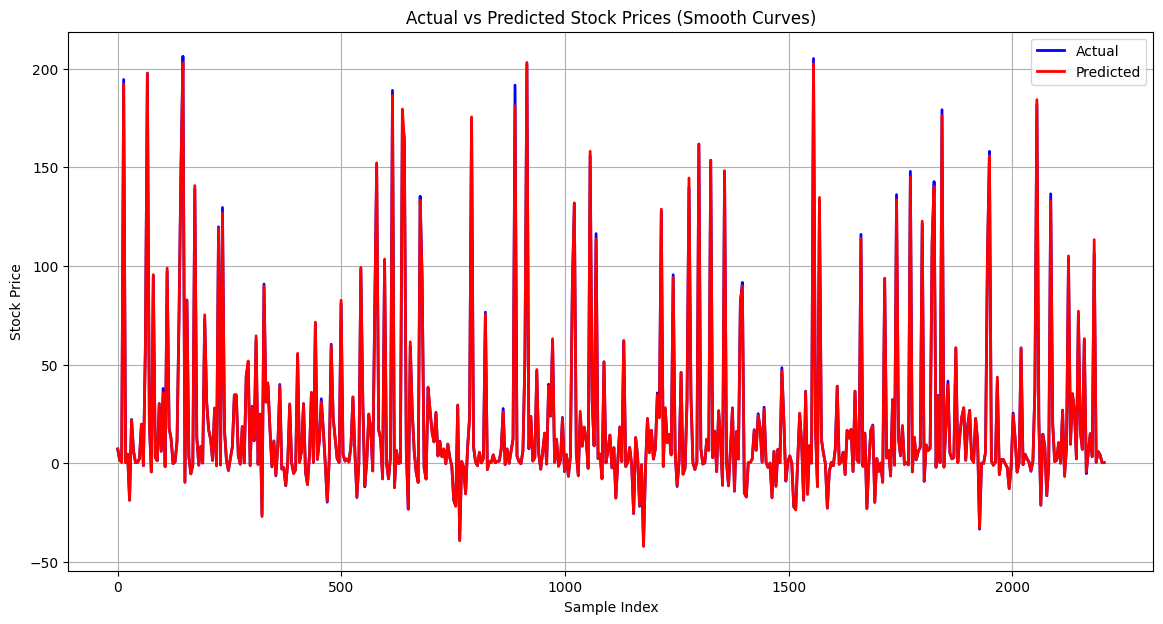

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Assuming you already have the DataFrame 'df' with features generated

# Step 1: Create a new target variable 'Next_Close' as the closing price shifted by 1 day
df['Next_Close'] = df['Close'].shift(-1)

# Drop the last row as it has NaN for 'Next_Close' after the shift
df = df[:-1]

# Step 2: Select the features and target variable
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Lag_1', 'Lag_7', 'Volatility_7', 'MA_7']
X = df[features]  # Features
y = df['Next_Close']  # Target (next day's closing price)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model (using Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# Optional: Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)

# Step 7: Plot Actual vs Predicted values as smooth curves
x_smooth = np.linspace(0, len(comparison)-1, 500)  # 500 points for a smooth curve

# Create smooth curves for Actual and Predicted
actual_smooth = make_interp_spline(np.arange(len(comparison)), comparison['Actual'])(x_smooth)
predicted_smooth = make_interp_spline(np.arange(len(comparison)), comparison['Predicted'])(x_smooth)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(x_smooth, actual_smooth, label='Actual', color='blue', linewidth=2)
plt.plot(x_smooth, predicted_smooth, label='Predicted', color='red', linewidth=2)
plt.title('Actual vs Predicted Stock Prices (Smooth Curves)')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()
